In [1]:
%matplotlib ipympl
import time

import minigeo.mpl_geometry as mgeo
from matplotlib import pyplot as plt
from minigeo.geometry import (
    BaseAxis,
    BaseBox,
    BaseCircle,
    BaseCone,
    BaseCylinder,
    BaseLine,
    BasePoint,
    BasePolygon,
    BaseRectangle,
    Transform,
)
from minigeo.mpl_geometry import MplBox, MplCone, MplCube, MplPoly, MplGroup
from minigeo.groups import GeometryGroup

# Geometry primitives

The geometric primitives are initialized by providing the center coordinates and then the respective dimensions.

In [2]:
point = BasePoint([1, 1, 1])
point

BasePoint at [1 1 1]

In [3]:
line = BaseLine([1, 1, 1], [2, 2, 2])
line

BaseLine from [1 1 1] to [2 2 2]

In [4]:
axis = BaseAxis([1, 0, 0], [0, 0, 0])
axis

BaseAxis at [0 0 0] with direction [1. 0. 0.]

In [5]:
rectangle = BaseRectangle([2, 0, 0], dimensions=[2, 4])
rectangle

BaseRectangle at [2 0 0] with vertices [[ 3. -2.  0.]
 [ 5. -2.  0.]
 [ 5.  2.  0.]
 [ 3.  2.  0.]]

In [6]:
box = BaseBox([0, 0, 0], dimensions=[1, 2, 3])
box

BaseBox at [0 0 0] with vertices [[-0.5 -1.  -1.5]
 [ 0.5 -1.  -1.5]
 [ 0.5  1.  -1.5]
 [-0.5  1.  -1.5]
 [-0.5 -1.   1.5]
 [ 0.5 -1.   1.5]
 [ 0.5  1.   1.5]
 [-0.5  1.   1.5]]

In [7]:
poly = BasePolygon([0, 0, 2], [[1, 1, 1], [1, 1, 0], [1, 0, 1]])
poly

BasePolygon at [0 0 2] with vertices [[1 1 3]
 [1 1 2]
 [1 0 3]]

In [8]:
radius = 2
circle = BaseCircle([0, 0, 0], dimensions=[2])
circle

BaseCircle at [0 0 0] with radius 2

In [9]:
radius = 2
height = 5
cylinder = BaseCylinder([2, 0, 0], dimensions=(radius, height))
cylinder

BaseCylinder at [2 0 0] with radius 2 and height 5

# Transformations

The `Transform` class allows for affine transformations such as translation, rotation around arbitrary axis, scaling and shears.

Here we use the `@` operator to apply a transformation on a geometric entity.

In [10]:
point = BasePoint([1.0, 1.0, 1.0])
print(point)
Transform().translate([1, 0, 0]) @ point

BasePoint at [1. 1. 1.]


In [11]:
point = BasePoint([1, 0, 0.0])

for i in range(9):
    Transform().rotate_z(10) @ point
    print(point)

BasePoint at [0.98480775 0.17364818 0.        ]
BasePoint at [0.93969262 0.34202014 0.        ]
BasePoint at [0.8660254 0.5       0.       ]
BasePoint at [0.76604444 0.64278761 0.        ]
BasePoint at [0.64278761 0.76604444 0.        ]
BasePoint at [0.5       0.8660254 0.       ]
BasePoint at [0.34202014 0.93969262 0.        ]
BasePoint at [0.17364818 0.98480775 0.        ]
BasePoint at [1.38777878e-16 1.00000000e+00 0.00000000e+00]


# Visualization
The visualization is based on the primitive shapes and in the `matplotlib` backend using polylines or collections of polygons to display them. 

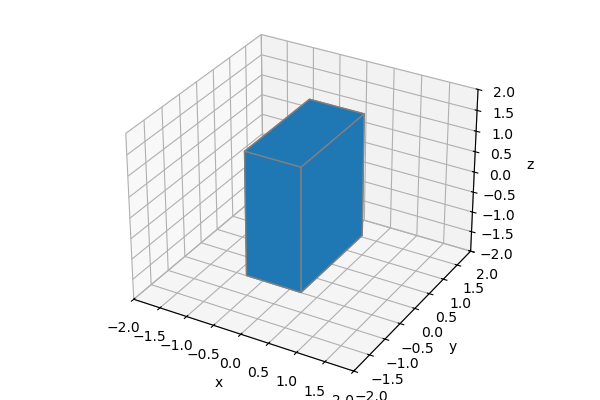

In [12]:
fig = plt.figure(figsize=(6, 4), constrained_layout=True)

ax = fig.add_subplot(
    111,
    projection="3d",
    computed_zorder=False,
)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

center = [0, 0, 0]
box = mgeo.MplBox(ax, center, (1, 2, 3))

In [13]:
center = [0, 0, 0]
radius = 0.5
height = 2
cylinder = mgeo.MplCylinder(ax, center, (radius, height), color="C2")
Transform().translate([2, 0, 0]) @ cylinder

In [14]:
line = mgeo.MplLine(ax, [-1, -1, -1], [1, -1, -1], color="red")
Transform().translate([0, 0, 1]) @ line

## Overview of all objects

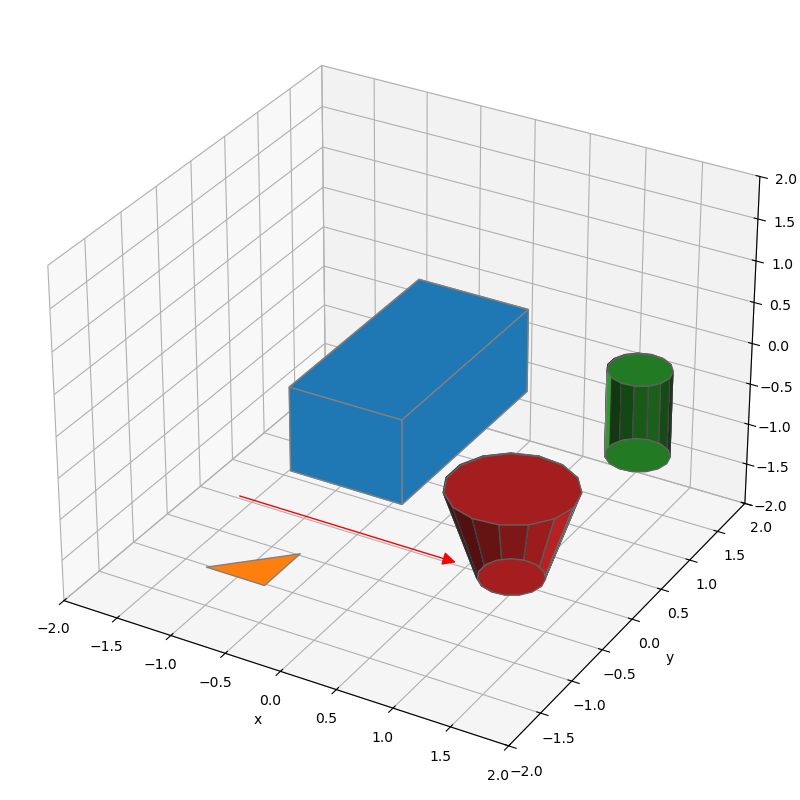

In [26]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)

ax = fig.add_subplot(
    111,
    projection="3d",
    computed_zorder=False,
)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

center = [0, 0, 0]
box = mgeo.MplBox(ax, center, (1, 2, 1))
poly = mgeo.MplPoly(ax, [0, -3, 0], [[0,0,0], [0.5,0.5,0], [0.5,0,0]], color='C1')
line = mgeo.MplLine(ax, [-1, -1, -1], [1, -1, -1], color="red", arrow_tip=True)

center = [0, 0, 0]
radius = 0.25
height = 1
cylinder = mgeo.MplCylinder(ax, [1,0,0], (radius, height), color="C2")

cylinder = mgeo.MplCone(ax, [1,-1,0], lower_radius=0.25, upper_radius=0.5, height=1, color="C3")

In [27]:
Transform().translate([0.05, -0.25, 0]) @ line

## With animations
In Jupyter Lab the `ipympl` backend of `matplotlib` also allows for simple animations or immediate updates. This requires a bit of setup code for the message handling as follows:

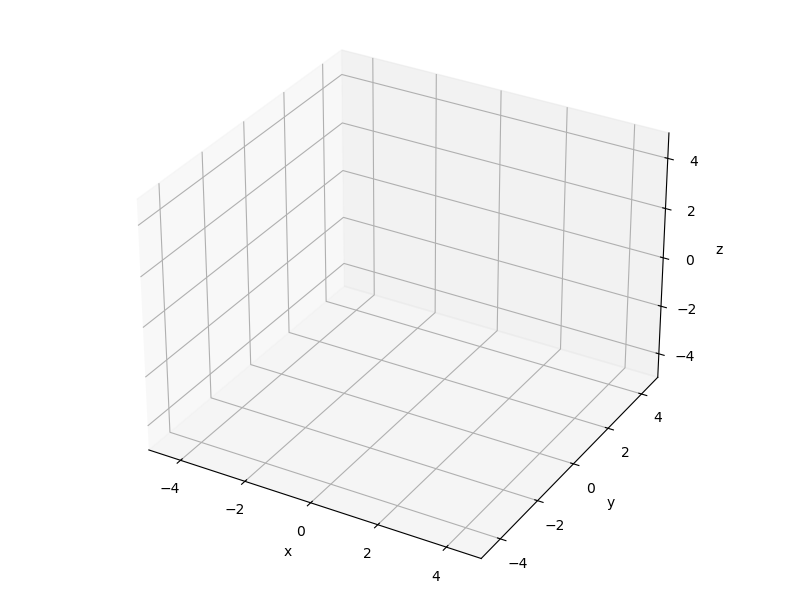

In [17]:
def display_immediately(fig):
    canvas = fig.canvas
    display(canvas)
    canvas._handle_message(canvas, {"type": "send_image_mode"}, [])
    canvas._handle_message(canvas, {"type": "refresh"}, [])
    canvas._handle_message(canvas, {"type": "initialized"}, [])
    canvas._handle_message(canvas, {"type": "draw"}, [])


with plt.ioff():
    fig = plt.figure(figsize=(8, 6), constrained_layout=True)

ax = fig.add_subplot(
    111,
    projection="3d",
    computed_zorder=False,
)
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_zlim((-5, 5))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

display_immediately(fig)

In [18]:
center = [0, 0, 0]
radius = 0.5
height = 2
cylinder = mgeo.MplCylinder(ax, center, (radius, height), color="C2")

for i in range(100):
    Transform().translate([0.05, 0, 0]) @ cylinder
    fig.canvas.draw()
    time.sleep(0.05)

# Object grouping

In [19]:
b1 = BaseBox([0,0,0], (1,2,3))
b2 = BaseBox([1,0,0], (4,5,6))
g = GeometryGroup((b1, b2))

In [20]:
g.geometries

(BaseBox at [0 0 0] with vertices [[-0.5 -1.  -1.5]
  [ 0.5 -1.  -1.5]
  [ 0.5  1.  -1.5]
  [-0.5  1.  -1.5]
  [-0.5 -1.   1.5]
  [ 0.5 -1.   1.5]
  [ 0.5  1.   1.5]
  [-0.5  1.   1.5]],
 BaseBox at [1 0 0] with vertices [[ 0.  -2.5 -3. ]
  [ 4.  -2.5 -3. ]
  [ 4.   2.5 -3. ]
  [ 0.   2.5 -3. ]
  [ 0.  -2.5  3. ]
  [ 4.  -2.5  3. ]
  [ 4.   2.5  3. ]
  [ 0.   2.5  3. ]])

In [21]:
Transform().translate([1,0,0]) @ g

In [22]:
[g.vertices for g in g.geometries]

[array([[ 0.5, -1. , -1.5],
        [ 1.5, -1. , -1.5],
        [ 1.5,  1. , -1.5],
        [ 0.5,  1. , -1.5],
        [ 0.5, -1. ,  1.5],
        [ 1.5, -1. ,  1.5],
        [ 1.5,  1. ,  1.5],
        [ 0.5,  1. ,  1.5]]),
 array([[ 1. , -2.5, -3. ],
        [ 5. , -2.5, -3. ],
        [ 5. ,  2.5, -3. ],
        [ 1. ,  2.5, -3. ],
        [ 1. , -2.5,  3. ],
        [ 5. , -2.5,  3. ],
        [ 5. ,  2.5,  3. ],
        [ 1. ,  2.5,  3. ]])]

### With matplotlib

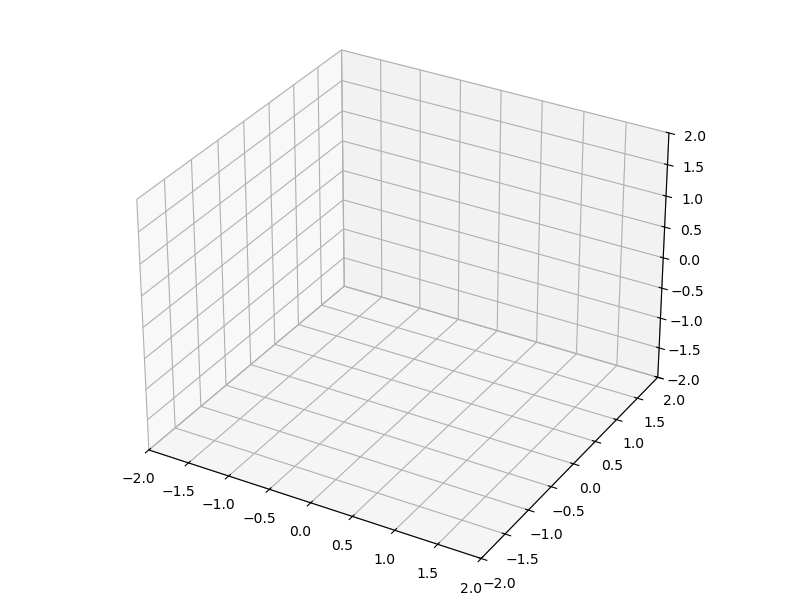

In [23]:
fig = plt.figure(figsize=(8, 6), constrained_layout=True)
ax = fig.add_subplot(111, projection="3d", computed_zorder=False,)

ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))

center = [0, 0, 0]
radius = 0.5
height = 2
cylinder = mgeo.MplCylinder(ax, center, (radius, height), color="C2", draw=False)

center = [1, 0, 0]
radius = 0.5
height = 2
cylinder2 = mgeo.MplCylinder(ax, center, (radius, height), color="C3", draw=False)

In [24]:
g = MplGroup(ax, [cylinder, cylinder2])

In [25]:
for _ in range(10):
    Transform().translate([0,-0.25,0]) @ g
    fig.canvas.draw()
    time.sleep(0.2)